PHYS 514 -- Final Project -- Tevfik Can Yüce, 64065

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as constants
import scipy.stats

Newton Part

Part (b):

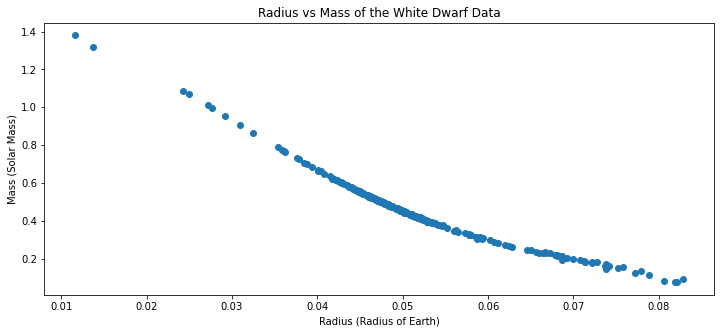

In [17]:
#Reading of the data file in .csv format
filename = 'white_dwarf_data.csv'

#Reading file in format of DataFrame
data_frame = pd.read_csv(filename)

#Convert mass and surface gravity to numpy array
logg_arr = data_frame.loc[:,"logg"].to_numpy()
mass_arr = data_frame.loc[:,"mass"].to_numpy()

#Converting Log Gravity to Radius
solar_mass = 1.98847e30
earth_radius = 6.3781e6
earth_gravity = 9.807
radius_arr = np.sqrt((constants.gravitational_constant * (mass_arr * solar_mass)) / (earth_gravity * np.power(earth_radius, 2) * np.power(10*np.ones(len(logg_arr)), logg_arr)))
#radius_arr = np.sqrt((constants.gravitational_constant * (mass_arr * solar_mass)) / (earth_gravity * np.power(earth_radius, 2) * np.exp(logg_arr)))

#Plotting the Data
plt.figure(figsize=(12,5))
plt.scatter(x=radius_arr, y=mass_arr)
plt.xlabel('Radius (Radius of Earth)')
plt.ylabel('Mass (Solar Mass)')
plt.title('Radius vs Mass of the White Dwarf Data')
plt.show()


Part (c):

-3.0082493216686235
-9.705561281298621


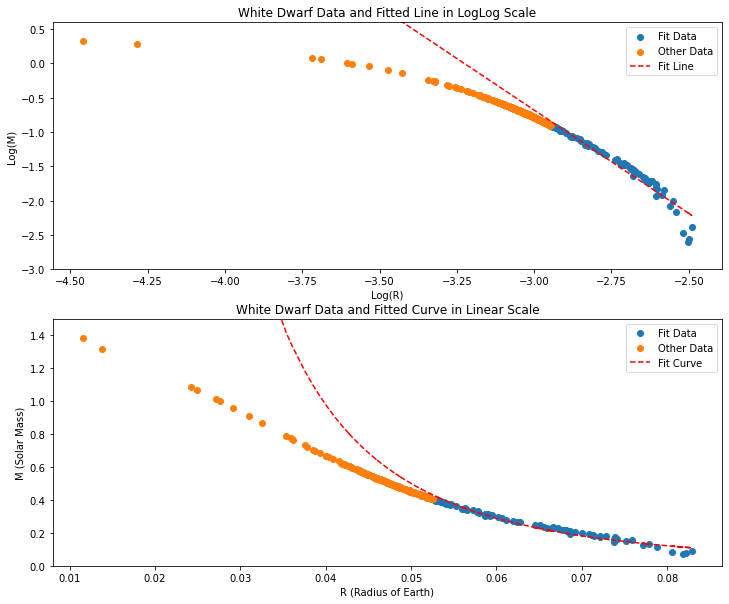

In [72]:
#Parameters
N = 80 #Smallest N stars are considered as low mass

#First sort the arrays w.r.t to mass
#Sorting the arrray
sort_idx = np.argsort(mass_arr)
radius_arr = radius_arr[sort_idx]
mass_arr = mass_arr[sort_idx]

#Fitting Line to Data in Log-Log Scale
regressed_line = scipy.stats.linregress(x=np.log(radius_arr[0:N]), y=np.log(mass_arr[0:N]))

#Plotting Data
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12,10)

#Plotting in Log Scale
ax[0].scatter(np.log(radius_arr[0:N]), np.log(mass_arr[0:N]))
ax[0].scatter(np.log(radius_arr[N:]), np.log(mass_arr[N:]))
ax[0].plot(np.log(radius_arr), regressed_line.slope * np.log(radius_arr) + regressed_line.intercept, '--', color='red')
ax[0].legend(['Fit Data', 'Other Data', 'Fit Line'])
ax[0].set_ylim([-3, 0.6])
ax[0].set_xlabel('Log(R)')
ax[0].set_ylabel('Log(M)')
ax[0].set_title('White Dwarf Data and Fitted Line in LogLog Scale')

#Plotting in Linear Scale
ax[1].scatter(radius_arr[0:N], mass_arr[0:N])
ax[1].scatter(radius_arr[N:], mass_arr[N:])
ax[1].plot(radius_arr, np.exp(regressed_line.intercept)*np.power(radius_arr, regressed_line.slope), '--', color='red')
ax[1].legend(['Fit Data', 'Other Data', 'Fit Curve'])
ax[1].set_ylim([0, 1.5])
ax[1].set_title('White Dwarf Data and Fitted Curve in Linear Scale')
ax[1].set_xlabel('R (Radius of Earth)')
ax[1].set_ylabel('M (Solar Mass)')

plt.show()

#Printing Results
print('Fitted value of slope is ' + str(regressed_line.slope))

-2.9087722122121598


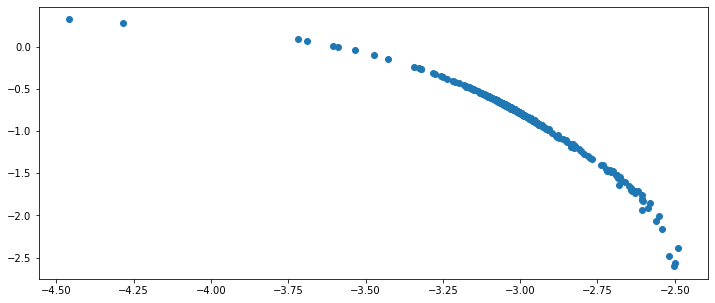

In [34]:
#Sorting the arrray
sort_idx = np.argsort(mass_arr)
radius_arr = radius_arr[sort_idx]
mass_arr = mass_arr[sort_idx]

regressed_line = scipy.stats.linregress(x=np.log(radius_arr[0:100]), y=np.log(mass_arr[0:100]))
print(regressed_line.slope)

plt.figure(figsize=(12,5))
plt.scatter(np.log(radius_arr), np.log(mass_arr))
plt.show()

In [45]:
print(mass_arr[0:15])
print(len(radius_arr))

[0.074 0.077 0.084 0.092 0.115 0.126 0.134 0.145 0.148 0.157 0.161 0.163
 0.164 0.172 0.176]
378
